In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

UsageError: Line magic function `%` not found.


## Simulate Poisson process

Generate sparse event in small time bins with fixed expected rateand compare with analytical Poisson distribution

In [2]:
###numerical
T = 1000  #seconds
dt = 0.01
rate = 10 #events per second
threshold = 1 - rate*dt;  #change threshold to fix event rate
timeseries = np.random.rand(int(T/dt))
timeseries[timeseries>threshold] = 1
timeseries[timeseries<=threshold] = 0

###analytical
Ns = np.linspace(0,30,30,dtype = int)
Pn = np.array([np.exp(-rate)*rate**nn/math.factorial(nn) for nn in Ns])

In [3]:
tau = 1  #in seconds
window = int(tau/dt)
samples = np.array([timeseries[tt:tt+window] for tt in range(0,len(timeseries)-window)])
samp_rate = np.sum(samples,axis=1)/tau

/usr/licensed/anaconda3/2018.12/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'probability')

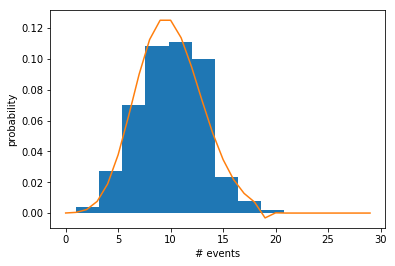

In [4]:
plt.hist(samp_rate,normed=True);
#plt.hold(True)
plt.plot(Pn,label='analytic')
plt.xlabel('# events')
plt.ylabel('probability')

## Anaylsis
What is the mean count? The variance? 

Do you have enough data to fill in the whole probability distribution $P_\tau (n)$ for counting $n$ of events in the window? 

How do all of these things change as you change $\tau$? 

What if you go back and make events with a different average rate? Do your numerical results agree with the theoretical expressions?

In [5]:
print('mean=',np.mean(samp_rate))
print('variance=',np.var(samp_rate))
print('ground truth=',rate)

mean= 9.93077077077077
variance= 9.540892999506012
ground truth= 10


In [6]:
def sim_Poisson(T,tau,rate):
    """
    Numerical Poisson process for parameter tuning
    """
    dt = 0.01
    threshold = 1 - rate*dt;
    timeseries = np.random.rand(int(T/dt))
    timeseries[timeseries>threshold] = 1
    timeseries[timeseries<=threshold] = 0
    window = int(tau/dt)
    samples = np.array([timeseries[tt:tt+window] for tt in range(0,len(timeseries)-window)])
    samp_rate = np.sum(samples,axis=1)/tau
    return samp_rate

In [7]:
rep = 10  #repeat test
means = np.array([np.mean(sim_Poisson(T,tau,rate)) for r in range(0,rep)])
varss = np.array([np.var(sim_Poisson(T,tau,rate)) for r in range(0,rep)])
print('mean=',np.mean(means),'±',np.std(means))
print('variance=',np.mean(varss),'±',np.std(varss))
print('ground truth=',rate)

mean= 9.958391391391391 ± 0.12436446983440645
variance= 8.97520063385708 ± 0.17958653500373167
ground truth= 10


Text(0, 0.5, 'probability')

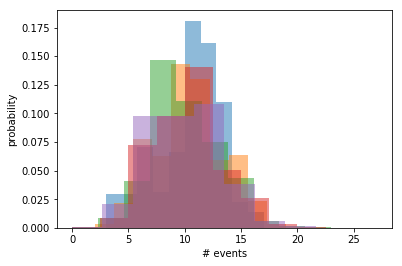

In [8]:
###scaling n events
Ts = np.logspace(1,5,num=5)
tau = 1
rate = 10
for ts in Ts:
    samp_rate = sim_Poisson(ts,tau,rate)
    plt.hist(samp_rate,normed=True,alpha=0.5);
plt.xlabel('# events')
plt.ylabel('probability')

###->distribution is quite stable under different length of simulated data

variance= 8.592304592480367
variance= 1.5625219691987577
variance= 0.8874279216151413
variance= 0.6343191973339517
variance= 0.5146783370585173


Text(0, 0.5, 'probability')

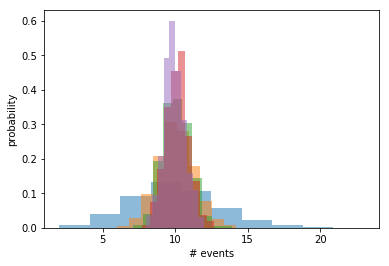

In [9]:
###changing tau
T = 1000
taus = np.array([1,5,10,15,20])
rate = 10
for tos in taus:
    samp_rate = sim_Poisson(T,tos,rate)
    plt.hist(samp_rate,normed=True,alpha=0.5);
    print('variance=',np.var(samp_rate))
plt.xlabel('# events')
plt.ylabel('probability')

###->the window of tau matters! The variance does not scale correctly when the window is too large

Text(0, 0.5, 'probability')

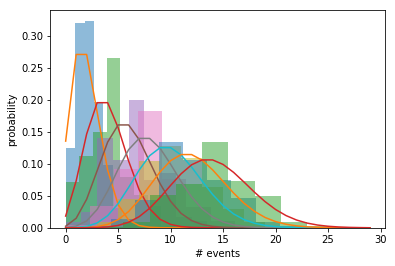

In [10]:
###different rate
T = 1000
tau = 1
rs = np.linspace(2,14,7)
for rr in rs:
    samp_rate = sim_Poisson(T,tau,rr)
    plt.hist(samp_rate,normed=True,alpha=0.5);
    #theoretical
    Pn = np.array([np.exp(-rr)*rr**nn/math.factorial(nn) for nn in Ns])
    plt.plot(Pn)
plt.xlabel('# events')
plt.ylabel('probability')

###->distribution scales for different rate value and agrees with analytic form

## Alternative by choosing time bins

Instead of deciding within each bin about the presence or absence of an event, use the command rand to choose $N$ random times in the big window $T$

In [11]:
N = 50  #random selection
rep = 1000  #repitition
ns = []  #selections
for rr in range(0,rep):
    select = np.random.choice(len(timeseries), N)
    subsampe = timeseries[select]
    ns.append(np.sum(subsampe)/(N*dt))

Text(0, 0.5, 'probability')

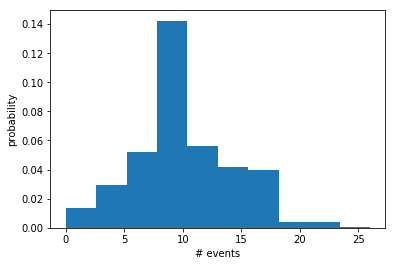

In [12]:
plt.hist(ns,normed=True);
plt.xlabel('# events')
plt.ylabel('probability')